In [9]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm 
import math
from matplotlib import gridspec
from scipy.stats import chi2_contingency



In [4]:
# reading in the stroke file & seeing first few rows of data
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# cleaning up dataframe

# adding clearner headers
stroke.columns = ['ID', 'Gender', 'Age', 'Hypertension', 'Heart Disease', 'Ever Married', 'Work Type', 'Residence Type', 'AVG Glucose Level', 'BMI', 'Smoking Status', 'Stroke']


In [6]:
# obtain descriptive statistics for the columns
stroke.describe()

,ID,Age,Hypertension,Heart Disease,AVG Glucose Level,BMI,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# count of the missing values per column
stroke.isnull().sum()

ID                     0
Gender                 0
Age                    0
Hypertension           0
Heart Disease          0
Ever Married           0
Work Type              0
Residence Type         0
AVG Glucose Level      0
BMI                  201
Smoking Status         0
Stroke                 0
dtype: int64

In [6]:
# filling missing data in BMI column with "not provided"
stroke.fillna("not provided")


,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,AVG Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,not provided,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,not provided,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


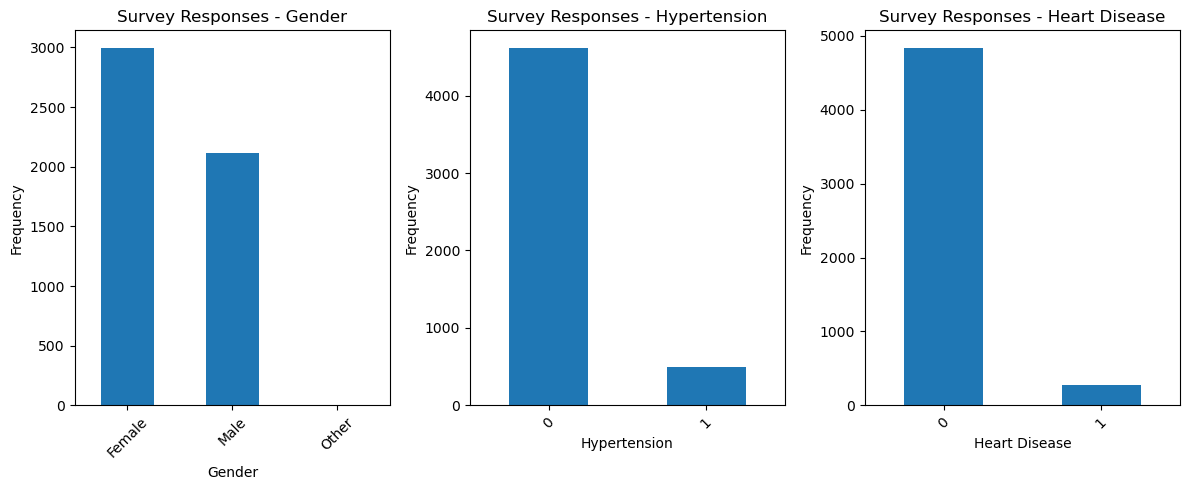

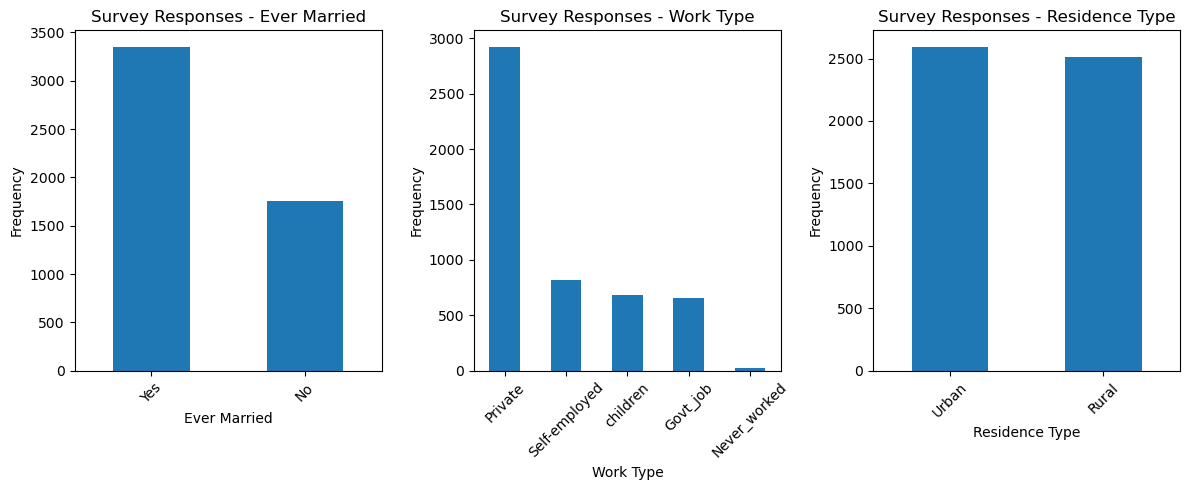

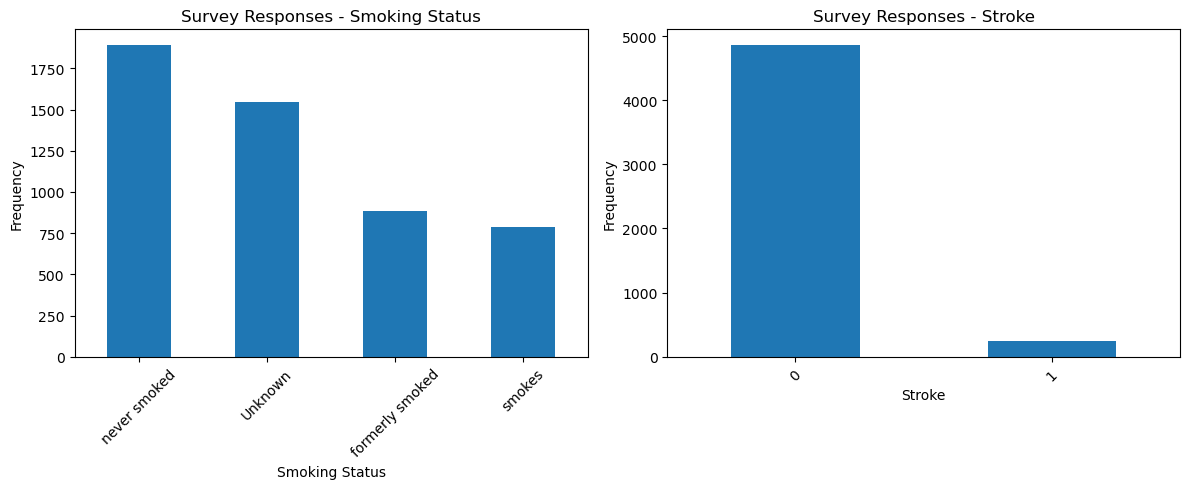

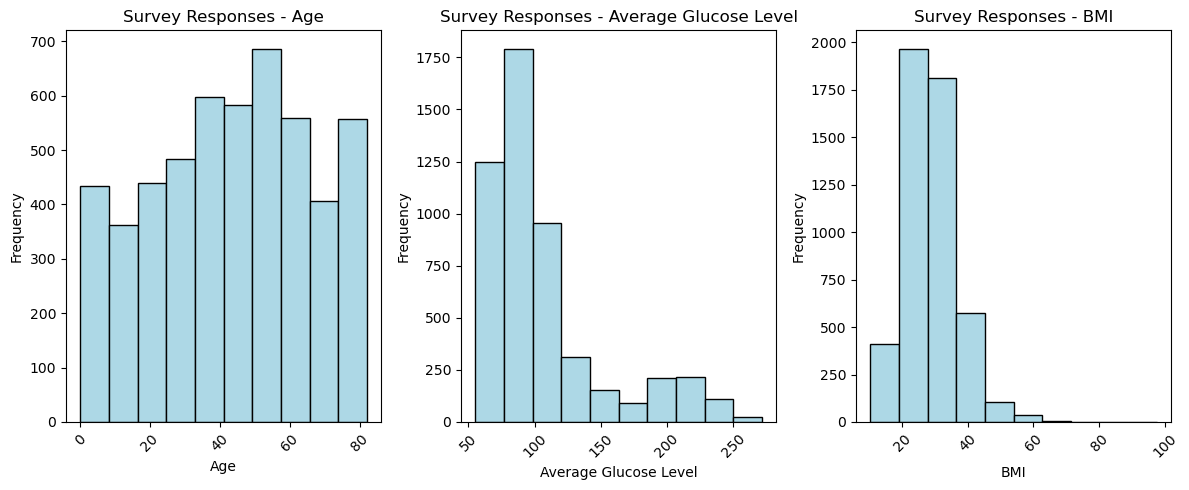

In [7]:
# Visualize distribution of each variable --> referencing module 5 lab
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
fig2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(12, 5))
fig3, (ax7, ax8) = plt.subplots(1, 2, figsize=(12, 5))
fig4, (ax9, ax10, ax11) = plt.subplots(1, 3, figsize=(12, 5))
#fig, axs = plt.subplots(3, 3, sharey=True, figsize=(12, 12))

# setting up bar plots for data that has discrete values

# Gender
bars1 = stroke['Gender'].value_counts().plot(ax=ax1, kind='bar', xlabel='Gender', ylabel='Frequency', title='Survey Responses - Gender', rot=45)

# Hypertension
stroke['Hypertension'].value_counts().plot(ax=ax2, kind='bar', xlabel='Hypertension', ylabel='Frequency', title='Survey Responses - Hypertension', rot=45)

# Heart Disease
stroke['Heart Disease'].value_counts().plot(ax=ax3, kind='bar', xlabel='Heart Disease', ylabel='Frequency', title='Survey Responses - Heart Disease', rot=45)


# Ever Married
stroke['Ever Married'].value_counts().plot(ax=ax4, kind='bar', xlabel='Ever Married', ylabel='Frequency', title='Survey Responses - Ever Married', rot=45)


# Work Type
stroke['Work Type'].value_counts().plot(ax=ax5, kind='bar', xlabel='Work Type', ylabel='Frequency', title='Survey Responses - Work Type', rot=45)


# Residence Type
stroke['Residence Type'].value_counts().plot(ax=ax6, kind='bar', xlabel='Residence Type', ylabel='Frequency', title='Survey Responses - Residence Type', rot=45)


# Smoking Status
stroke['Smoking Status'].value_counts().plot(ax=ax7, kind='bar', xlabel='Smoking Status', ylabel='Frequency', title='Survey Responses - Smoking Status', rot=45)


# Stroke
stroke['Stroke'].value_counts().plot(ax=ax8, kind='bar', xlabel='Stroke', ylabel='Frequency', title='Survey Responses - Stroke', rot=45)


# Age
stroke['Age'].plot(ax=ax9, kind='hist', xlabel='Age', ylabel='Frequency', title='Survey Responses - Age', color='lightblue', edgecolor='black', rot=45)
# Average Glucose Levels
stroke['AVG Glucose Level'].plot(ax=ax10, kind='hist', xlabel='Average Glucose Level', ylabel='Frequency', title='Survey Responses - Average Glucose Level', color='lightblue', edgecolor='black', rot=45)
# BMI
stroke['BMI'].plot(ax=ax11, kind='hist', xlabel='BMI', ylabel='Frequency', title='Survey Responses - BMI', color='lightblue', edgecolor='black', rot=45)


fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
fig4.tight_layout()


plt.show()

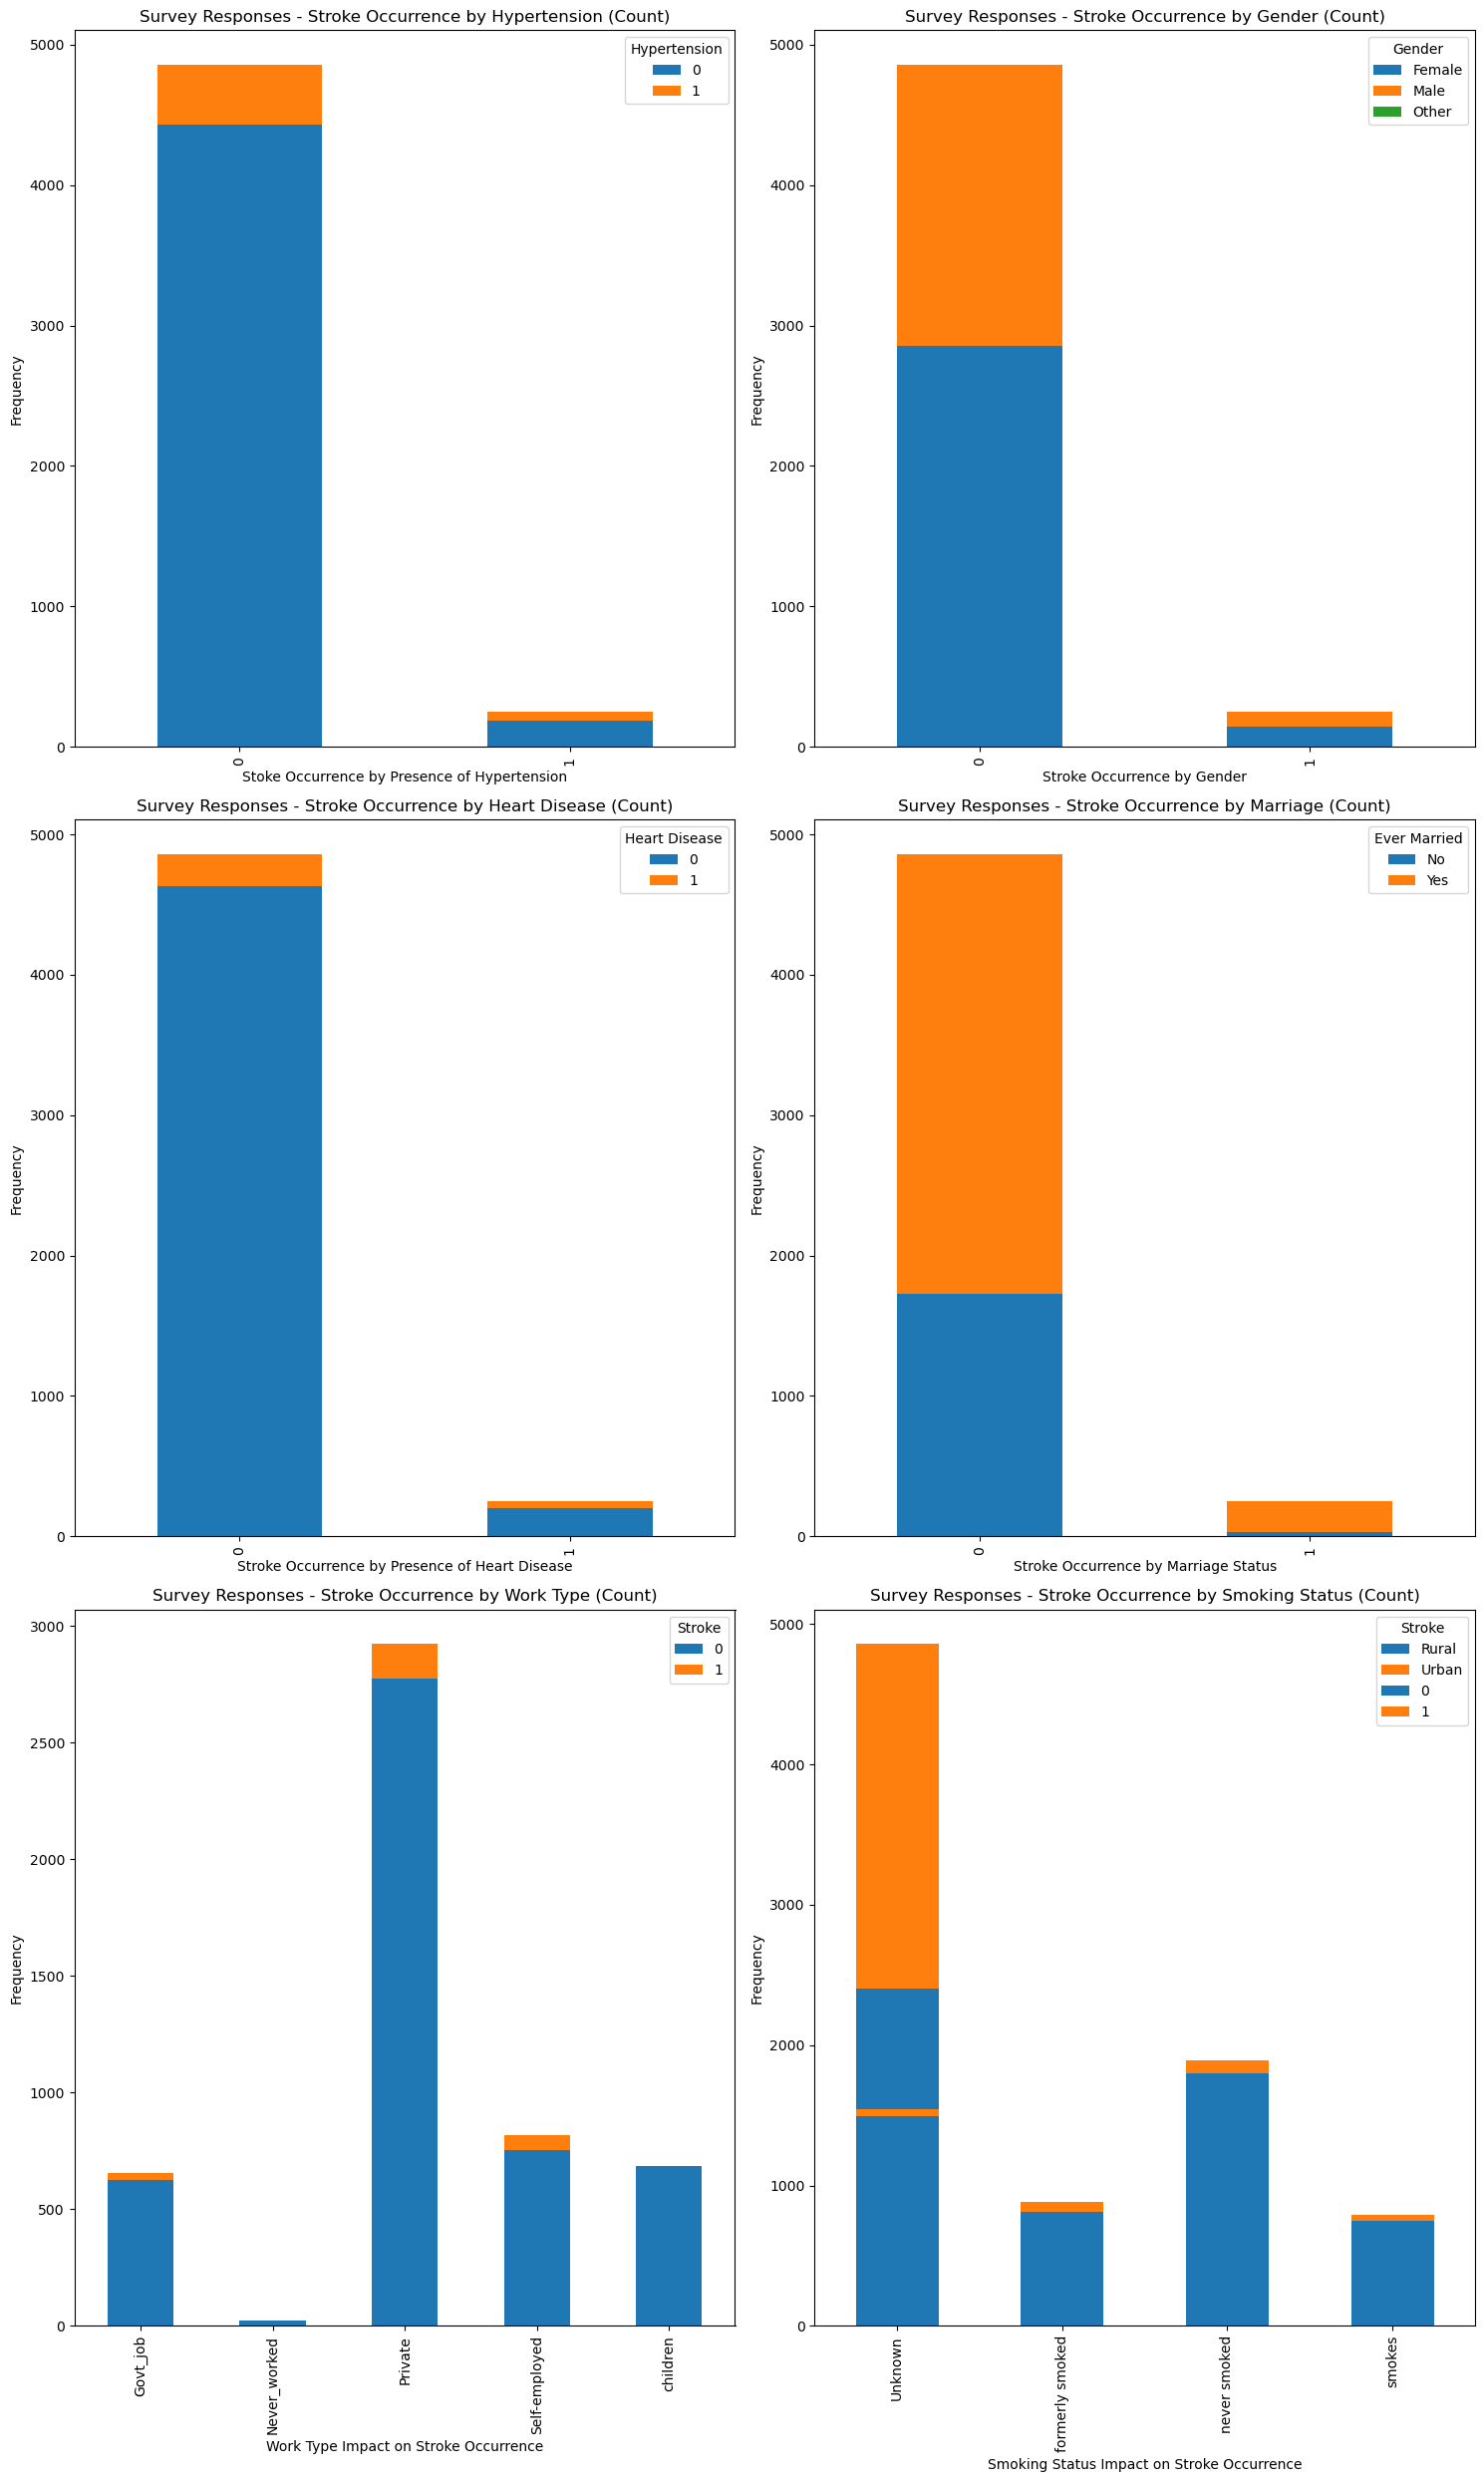

In [8]:
# using code from module 5 lab as a structure

# Prepared data for visualization
def percent_of_total(last_column):
    percent_of_total = stroke.groupby(['stroke', last_column]).size().unstack()
    for i in range(len(percent_of_total)):
        percent_of_total.iloc[i,:] = percent_of_total.iloc[i,:]/sum(percent_of_total.iloc[i,:])
    return percent_of_total

    
# Visualize relationship between stroke and various variables
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize=(15, 25))
# Count for stroke and hypertension
stroke.groupby(['Stroke', 'Hypertension']).size().unstack().plot(ax=ax1, kind='bar', stacked=True, xlabel='Stoke Occurrence by Presence of Hypertension', 
                                                                  ylabel='Frequency', title='Survey Responses - Stroke Occurrence by Hypertension (Count)')

# Count for gender and stroke
stroke.groupby(['Stroke', 'Gender']).size().unstack().plot(ax=ax2, kind='bar', stacked=True, xlabel='Stroke Occurrence by Gender', 
                                                                ylabel='Frequency', title='Survey Responses - Stroke Occurrence by Gender (Count)')

# Count for heart disease and stroke
stroke.groupby(['Stroke', 'Heart Disease']).size().unstack().plot(ax=ax3, kind='bar', stacked=True, xlabel='Stroke Occurrence by Presence of Heart Disease', 
                                                                ylabel='Frequency', title='Survey Responses - Stroke Occurrence by Heart Disease (Count)')

# Count for marriage and stroke
stroke.groupby(['Stroke', 'Ever Married']).size().unstack().plot(ax=ax4, kind='bar', stacked=True, xlabel='Stroke Occurrence by Marriage Status', 
                                                                ylabel='Frequency', title='Survey Responses - Stroke Occurrence by Marriage (Count)')


# Count for work type and stroke
stroke.groupby(['Work Type', 'Stroke']).size().unstack().plot(ax=ax5, kind='bar', stacked=True, xlabel='Work Type Impact on Stroke Occurrence',
                                                                ylabel='Frequency', title='Survey Responses - Stroke Occurrence by Work Type (Count)')

# Count for residence type and stroke
stroke.groupby(['Stroke', 'Residence Type']).size().unstack().plot(ax=ax6, kind='bar', stacked=True, xlabel='Stroke Occurrence by Residence Type', 
                                                                ylabel='Frequency', title='Survey Responses - Stroke Occurrence by Residence Type (Count)')

# Count for smoking status and stroke
stroke.groupby(['Smoking Status', 'Stroke']).size().unstack().plot(ax=ax6, kind='bar', stacked=True, xlabel='Smoking Status Impact on Stroke Occurrence', 
                                                                ylabel='Frequency', title='Survey Responses - Stroke Occurrence by Smoking Status (Count)')






fig.tight_layout()
plt.show()

In [9]:
# Create frequency tables - hypertension
bold = '\033[1m'
normal = '\033[0m'

print(f'{bold}Frequncy Table - Hypertension{normal}')
hypertension_table = pd.crosstab(stroke['Hypertension'], stroke['Stroke'])
print(hypertension_table)
print(' ')
print(pd.crosstab(stroke['Hypertension'], stroke['Stroke'], normalize='index'))
print('\n')

# Create frequency tables - gender
print(f'{bold}Frequncy Table - Gender{normal}')
gender_table = pd.crosstab(stroke['Gender'], stroke['Stroke'])
print(gender_table)
print(' ')
print(pd.crosstab(stroke['Gender'], stroke['Stroke'], normalize='index'))
print('\n')

# Create frequency tables - heart disease
print(f'{bold}Frequncy Table - Heart Disease{normal}')
hd_table = pd.crosstab(stroke['Heart Disease'], stroke['Stroke'])
print(hd_table)
print(' ')
print(pd.crosstab(stroke['Heart Disease'], stroke['Stroke'], normalize='index'))
print('\n')

# Create frequency tables - ever married
print(f'{bold}Frequncy Table - Ever Married{normal}')
em_table = pd.crosstab(stroke['Ever Married'], stroke['Stroke'])
print(hd_table)
print(' ')
print(pd.crosstab(stroke['Ever Married'], stroke['Stroke'], normalize='index'))
print('\n')

# Create frequency tables - work type
print(f'{bold}Frequncy Table - Work Type{normal}')
wt_table = pd.crosstab(stroke['Work Type'], stroke['Stroke'])
print(hd_table)
print(' ')
print(pd.crosstab(stroke['Work Type'], stroke['Stroke'], normalize='index'))
print('\n')

# Create frequency tables - smoking status
print(f'{bold}Frequncy Table - Smoking Status{normal}')
ss_table = pd.crosstab(stroke['Smoking Status'], stroke['Stroke'])
print(hd_table)
print(' ')
print(pd.crosstab(stroke['Smoking Status'], stroke['Stroke'], normalize='index'))
print('\n')


Frequncy Table - Hypertension
Stroke           0    1
Hypertension           
0             4429  183
1              432   66
 
Stroke               0         1
Hypertension                    
0             0.960321  0.039679
1             0.867470  0.132530


Frequncy Table - Gender
Stroke     0    1
Gender           
Female  2853  141
Male    2007  108
Other      1    0
 
Stroke         0         1
Gender                    
Female  0.952906  0.047094
Male    0.948936  0.051064
Other   1.000000  0.000000


Frequncy Table - Heart Disease
Stroke            0    1
Heart Disease           
0              4632  202
1               229   47
 
Stroke                0         1
Heart Disease                    
0              0.958213  0.041787
1              0.829710  0.170290


Frequncy Table - Ever Married
Stroke            0    1
Heart Disease           
0              4632  202
1               229   47
 
Stroke               0         1
Ever Married                    
No            0.

In [10]:
# Using from Module 5 Lab - Creating function for ch-square test to determine relationships
def chisquare_test(table):
    stat, p_value, dof, expected = chi2_contingency(table, correction=False)
    # Interpret p-value
    alpha = 0.05
    print("The p-value is {}".format(p_value))
    if p_value <= alpha:
        print('There is a relationship between the variables.')
    else:
        print('There is NO relationship between the variables.')


In [11]:
# Perform chi-square test to determine if there is a relationship between stroke and hypertension
print(f'{bold}Chi-Square Test - Hypertension{normal}')
chisquare_test(hypertension_table)
print('\n')

# Perform chi-square test to determine if there is a relationship between stroke and gender
print(f'{bold}Chi-Square Test - Gender{normal}')
chisquare_test(gender_table)
print('\n')

# Perform chi-square test to determine if there is a relationship between stroke and heart disease
print(f'{bold}Chi-Square Test - Heart Disease{normal}')
chisquare_test(hd_table)
print('\n')

# Perform chi-square test to determine if there is a relationship between stroke and ever married
print(f'{bold}Chi-Square Test - Ever Married{normal}')
chisquare_test(em_table)
print('\n')

# Perform chi-square test to determine if there is a relationship between stroke and work type
print(f'{bold}Chi-Square Test - Work Type{normal}')
chisquare_test(wt_table)
print('\n')

# Perform chi-square test to determine if there is a relationship between stroke and smoking status
print(f'{bold}Chi-Square Test - Smoking Status{normal}')
chisquare_test(ss_table)
print('\n')




Chi-Square Test - Hypertension
The p-value is 6.068123323489793e-20
There is a relationship between the variables.


Chi-Square Test - Gender
The p-value is 0.7895490538408245
There is NO relationship between the variables.


Chi-Square Test - Heart Disease
The p-value is 5.200109767379846e-22
There is a relationship between the variables.


Chi-Square Test - Ever Married
The p-value is 9.58932501427625e-15
There is a relationship between the variables.


Chi-Square Test - Work Type
The p-value is 5.397707801896119e-10
There is a relationship between the variables.


Chi-Square Test - Smoking Status
The p-value is 2.0853997025008455e-06
There is a relationship between the variables.




Model And Method Portion.... Hassaan's Work 

1) Logistics Regression Model and Mthods:
A) Prepocessing Pipeline:

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


df = pd.read_csv("healthcare-dataset-stroke-data.csv")

if "id" in df.columns:
    df.drop(columns=["id"], inplace=True)

print(df.head())

TARGET = "stroke"
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)


cat_cols = [c for c in X.columns if X[c].dtype == "object"]
num_cols = [c for c in X.columns if c not in cat_cols]

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


model = Pipeline([
    ("prep", preprocess),
    ("lr", LogisticRegression(max_iter=1000, class_weight="balanced", penalty="l2", solver="liblinear"))
])

model.fit(X_train, y_train)


proba = model.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)

print("ROC-AUC:", round(roc_auc_score(y_test, proba), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred, digits=3))


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
ROC-AUC: 0.844

Confusion Matrix:
 [[722 250]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   

/Users/hassaanabbasi/Downloads/University Of San Diego/Probability and Statistics for Artificial Intelligence (AAI-500)/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hassaanabbasi/Downloads/University Of San Diego/Probability and Statistics for Artificial Intelligence (AAI-500)/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hassaanabbasi/Downloads/University Of San Diego/Probability and Statistics for Artificial Intelligence (AAI-500)/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Method 2: Class Imbalance Handling

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import numpy as np

# numeric + categorical lists you already have:
# num_cols, cat_cols

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),

    ("onehot", OneHotEncoder(
        handle_unknown="infrequent_if_exist",  # unseen + rare go to "infrequent"
        min_frequency=0.01,                     
        sparse_output=False
    )),
])

preprocess = ColumnTransformer(
    [("num", num_pipe, num_cols),
     ("cat", cat_pipe, cat_cols)],
    remainder="drop",
    sparse_threshold=0.0
)

# Clip extreme magnitudes after preprocessing to prevent overflow in X @ w
clipper = FunctionTransformer(lambda X: np.clip(X, -8.0, 8.0), feature_names_out="one-to-one")

pipe = Pipeline([
    ("prep", preprocess),
    ("vt", VarianceThreshold(1e-12)),  # drop constant/all-zero columns
    ("clip", clipper),
    ("lr", LogisticRegression(
        solver="saga",           
        penalty="l2",
        C=0.01,                  # stronger regularization
        class_weight="balanced",
        max_iter=5000,
        tol=1e-3,
        random_state=42,
        n_jobs=-1
    ))
])

pipe.fit(X_train, y_train)

proba = pipe.predict_proba(X_test)[:, 1]
pred  = (proba >= 0.5).astype(int)

print("ROC-AUC:", round(roc_auc_score(y_test, proba), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred, digits=3))


ROC-AUC: 0.839

Confusion Matrix:
 [[716 256]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0      0.986     0.737     0.843       972
           1      0.135     0.800     0.231        50

    accuracy                          0.740      1022
   macro avg      0.561     0.768     0.537      1022
weighted avg      0.945     0.740     0.813      1022



/Users/hassaanabbasi/Downloads/University Of San Diego/Probability and Statistics for Artificial Intelligence (AAI-500)/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hassaanabbasi/Downloads/University Of San Diego/Probability and Statistics for Artificial Intelligence (AAI-500)/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hassaanabbasi/Downloads/University Of San Diego/Probability and Statistics for Artificial Intelligence (AAI-500)/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [12]:
print(df[num_cols].describe(percentiles=[0.01,0.99]).T)


                    count        mean        std    min       1%     50%  \
age                5110.0   43.226614  22.612647   0.08   1.0800  45.000   
hypertension       5110.0    0.097456   0.296607   0.00   0.0000   0.000   
heart_disease      5110.0    0.054012   0.226063   0.00   0.0000   0.000   
avg_glucose_level  5110.0  106.147677  45.283560  55.12  56.3309  91.885   
bmi                4909.0   28.893237   7.854067  10.30  15.1000  28.100   

                        99%     max  
age                 82.0000   82.00  
hypertension         1.0000    1.00  
heart_disease        1.0000    1.00  
avg_glucose_level  240.7082  271.74  
bmi                 53.4000   97.60  


Method 3) Regression + CV

In [18]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import numpy as np

proba = grid.predict_proba(X_test)[:, 1]
prec, rec, thr = precision_recall_curve(y_test, proba)

beta = 2.0  # F2 favors recall
f2 = (1+beta**2) * (prec*rec) / (beta**2*prec + rec + 1e-12)

best_i = np.nanargmax(f2)
best_thr = thr[best_i]  # note: thr has length = len(prec)-1

print("Best threshold by F2:", round(float(best_thr), 3))
print("At that point -> precision, recall, F2:",
      round(float(prec[best_i]),3), round(float(rec[best_i]),3), round(float(f2[best_i]),3))

pred_f2 = (proba >= best_thr).astype(int)
print("\nConfusion matrix @F2-opt threshold:\n", confusion_matrix(y_test, pred_f2))
print("\nReport @F2-opt threshold:\n", classification_report(y_test, pred_f2, digits=3))


Best threshold by F2: 0.675
At that point -> precision, recall, F2: 0.222 0.72 0.497

Confusion matrix @F2-opt threshold:
 [[846 126]
 [ 14  36]]

Report @F2-opt threshold:
               precision    recall  f1-score   support

           0      0.984     0.870     0.924       972
           1      0.222     0.720     0.340        50

    accuracy                          0.863      1022
   macro avg      0.603     0.795     0.632      1022
weighted avg      0.946     0.863     0.895      1022



/Users/hassaanabbasi/Downloads/University Of San Diego/Probability and Statistics for Artificial Intelligence (AAI-500)/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hassaanabbasi/Downloads/University Of San Diego/Probability and Statistics for Artificial Intelligence (AAI-500)/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hassaanabbasi/Downloads/University Of San Diego/Probability and Statistics for Artificial Intelligence (AAI-500)/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Method 4) Probability Calibration & threshold Selection

In [20]:

import numpy as np, warnings
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_recall_curve, classification_report, confusion_matrix
)
from sklearn.exceptions import UndefinedMetricWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    old_err = np.seterr(all="ignore")  

    best_pipe = grid.best_estimator_

    cal = CalibratedClassifierCV(
        estimator=best_pipe,
        method="isotonic", 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    )
    cal.fit(X_train, y_train)

    proba_cal = cal.predict_proba(X_test)[:, 1]

    roc = roc_auc_score(y_test, proba_cal)
    pr  = average_precision_score(y_test, proba_cal)
    print(f"Calibrated TEST ROC-AUC: {roc:.3f}")
    print(f"Calibrated TEST PR-AUC : {pr:.3f}")


    def threshold_by_fbeta(y_true, y_score, beta=2.0):
        prec, rec, thr = precision_recall_curve(y_true, y_score)
        fbeta = (1+beta**2) * (prec*rec) / (beta**2*prec + rec + 1e-12)
        idx = np.nanargmax(fbeta[:-1])
        return float(thr[idx]), float(prec[idx]), float(rec[idx]), float(fbeta[idx])

    def threshold_by_recall(y_true, y_score, target_recall=0.85):
        prec, rec, thr = precision_recall_curve(y_true, y_score)
        cand = np.where(rec[:-1] >= target_recall)[0]
        if len(cand) == 0:
    
            t, p, r, f2 = threshold_by_fbeta(y_true, y_score, beta=2.0)
            return t, p, r, f2
        i = cand[0]
        return float(thr[i]), float(prec[i]), float(rec[i]), float((1+2**2)*(prec[i]*rec[i])/(2**2*prec[i]+rec[i]+1e-12))

    t_f2, p_f2, r_f2, f2 = threshold_by_fbeta(y_test, proba_cal, beta=2.0)
    t_rec, p_rec, r_rec, f2_rec = threshold_by_recall(y_test, proba_cal, target_recall=0.85)

    print("\nChosen thresholds:")
    print(f" - F2-opt threshold: {t_f2:.3f}  (P={p_f2:.3f}, R={r_f2:.3f}, F2={f2:.3f})")
    print(f" - Recall≥0.85 thr : {t_rec:.3f}  (P={p_rec:.3f}, R={r_rec:.3f}, F2={f2_rec:.3f})")

 
    for label, t in [("F2-opt", t_f2), ("Recall-target", t_rec)]:
        y_pred = (proba_cal >= t).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        print(f"\n[{label}] threshold={t:.3f}")
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n",
              classification_report(y_test, y_pred, digits=3, zero_division=0))

    np.seterr(**{k: 'warn' for k in old_err})


Calibrated TEST ROC-AUC: 0.840
Calibrated TEST PR-AUC : 0.240

Chosen thresholds:
 - F2-opt threshold: 0.111  (P=0.205, R=0.720, F2=0.479)
 - Recall≥0.85 thr : 0.000  (P=0.049, R=1.000, F2=0.205)

[F2-opt] threshold=0.111
Confusion Matrix:
 [[832 140]
 [ 14  36]]
Classification Report:
               precision    recall  f1-score   support

           0      0.983     0.856     0.915       972
           1      0.205     0.720     0.319        50

    accuracy                          0.849      1022
   macro avg      0.594     0.788     0.617      1022
weighted avg      0.945     0.849     0.886      1022


[Recall-target] threshold=0.000
Confusion Matrix:
 [[  0 972]
 [  0  50]]
Classification Report:
               precision    recall  f1-score   support

           0      0.000     0.000     0.000       972
           1      0.049     1.000     0.093        50

    accuracy                          0.049      1022
   macro avg      0.024     0.500     0.047      1022
weighted avg  